In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pandas as pd

pd.set_option('display.max_colwidth', None) # Show full column content


print(f"""OSMnx version: {ox.__version__}""")

f"""NetworkX version: {nx.__version__}"""

/Users/catherine/Library/Caches/pypoetry/virtualenvs/gpbp-ys_3FNdB-py3.10/lib/python3.10/site-packages/geopandas/_compat.py:154: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  set_use_pygeos()


OSMnx version: 1.2.3


'NetworkX version: 3.2.1'

In [2]:
G = ox.load_graphml('walk_network_4_nodes_6_edges.graphml')

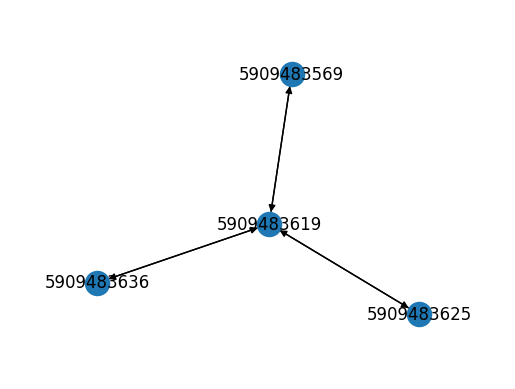

In [3]:
nx.draw_networkx(G)


# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [4]:
from gpbp.distance import _get_poly_nx


(actual_nodes_gdf, actual_edges_gdf) = _get_poly_nx(
        G, road_node=5909483619, dist_value=50, distance_type="length"
    )

actual_nodes_gdf

,geometry
id,
5909483625,POINT (-122.23124 37.76876)
5909483619,POINT (-122.23141 37.76871)
5909483636,POINT (-122.23178 37.76896)


In [7]:
actual_edges_gdf

0                                                                   LINESTRING (-122.23124 37.76876, -122.23141 37.76871)
1                                                                   LINESTRING (-122.23141 37.76871, -122.23124 37.76876)
2    LINESTRING (-122.23141 37.76871, -122.23148 37.76877, -122.23156 37.76882, -122.23167 37.76890, -122.23178 37.76896)
3    LINESTRING (-122.23178 37.76896, -122.23167 37.76890, -122.23156 37.76882, -122.23148 37.76877, -122.23141 37.76871)
dtype: geometry

In [24]:

# print more decimals for x and y

pd.options.display.float_format = '{:.5f}'.format

actual_nodes_gdf.get_coordinates()



,x,y
id,,
5909483625,-122.23124,37.76876
5909483619,-122.23141,37.76871
5909483636,-122.23178,37.76896


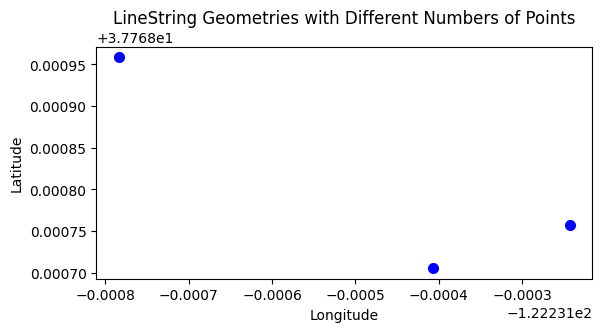

In [27]:
# Plot the GeoDataFrame
ax = actual_nodes_gdf.plot(color='blue', linewidth=2, marker=None)

# Customize plot
ax.set_title('LineString Geometries with Different Numbers of Points')  # Add a title
ax.set_xlabel('Longitude')                                            # Label X-axis
ax.set_ylabel('Latitude')                                             # Label Y-axis
ax.set_aspect('equal', 'box')                                         # Equal scaling for X and Y axes

# Show plot
plt.show()